In [2]:
import pandas as pd

In [3]:
data= pd.read_csv("C:/Users/NALINA/Downloads/IMDb Movies India.csv", encoding='ISO-8859-1')
print(data.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [4]:
print(data.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [5]:
data= data.dropna(subset=['Votes', 'Genre', 'Director'])

In [6]:
data['Votes'] = data['Votes'].str.replace(',', '')
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

In [7]:
data = data.dropna(subset=['Votes', 'Genre', 'Director'])

In [8]:
data['Genre'] = data['Genre'].str.split(',').str[0]

In [9]:
from sklearn.preprocessing import LabelEncoder
text_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

In [10]:
for col in text_columns:
    data[col] = data[col].fillna('Unknown')
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

In [11]:
X = data[['Votes', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
predictions = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(" Mean Squared Error (no year/duration):", mse)
print(" Sample Predictions:", predictions[:5])

 Mean Squared Error (no year/duration): 1.6231878989123483
 Sample Predictions: [5.37  5.601 6.458 4.672 6.024]


In [16]:
import matplotlib.pyplot as plt

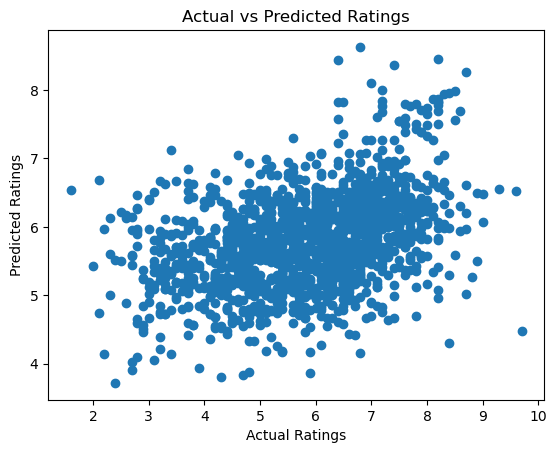

In [17]:
plt.scatter(y_test, predictions)  
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()